In [1]:
# read in the packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
import time

In [2]:
# read in the dataset
df = pd.read_csv("Tetuan City power consumption.csv")
df["Total Power Consumption"] = df.iloc[:, -3:].sum(axis=1)
df.drop(columns=list(df.iloc[:, -4:-1].columns), inplace=True)
df.drop(columns=["DateTime"], inplace=True)
df_scaled = StandardScaler().fit_transform(df)


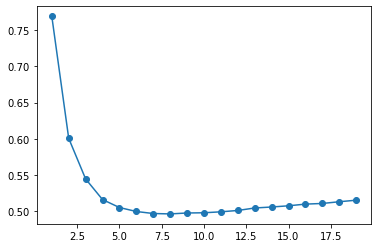

The minimum error of 0.4960705570798051 is reach at k = 7.


In [3]:
error_rate = []
np.random.seed(131)
df_scaled_x = df_scaled[:, 0 : df_scaled.shape[1] - 1]
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_x,
    df_scaled[:, df_scaled.shape[1] - 1],
    random_state=0,
    test_size=0.30,
)

for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test, pred))

plt.plot(range(1,20),error_rate, marker='o')
plt.show()

print(f"The minimum error of {min(error_rate)} is reach at k = {np.argmin(error_rate)}.")

training R^2 with 5 features is 0.6353333310168895.
test R^2 with 5 features is 0.504207491508797.
training R^2 with 4 features is 0.619342530302668.
test R^2 with 4 features is 0.4855304557150968.
training R^2 with 3 features is 0.5869586736174339.
test R^2 with 3 features is 0.43548472089315693.
training R^2 with 2 features is 0.5085579209874372.
test R^2 with 2 features is 0.33330098399737695.
training R^2 with 1 features is 0.2819193391337109.
test R^2 with 1 features is 0.04286684001651753.


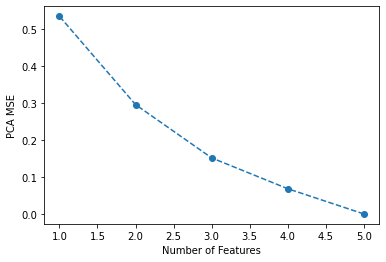

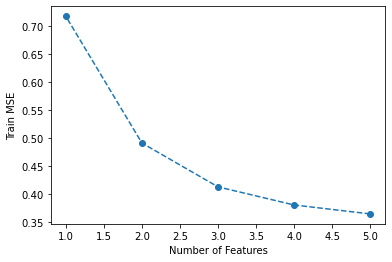

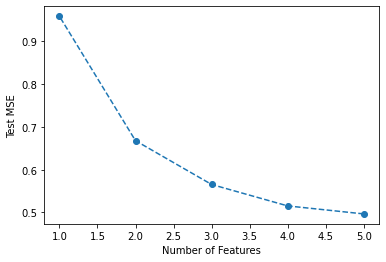

In [39]:
time_stamps = {}
train_mse = []
test_mse = []
pca_mse = []
df_scaled_x = df_scaled[:, 0 : df_scaled.shape[1] - 1]
for i in list(range(1, df_scaled_x.shape[1] + 1))[::-1]:
    # pca
    start_time = time.time()
    pca = PCA(n_components=i)
    pca.fit(df_scaled_x)
    X_Reduced = pca.transform(df_scaled_x)
    XReconstructed = pca.inverse_transform(X_Reduced)
    pca_mse.append(mean_squared_error(df_scaled_x, XReconstructed))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"pca component {i}"] = {"pca fit":total}

    # partitioning the data
    np.random.seed(131)
    X_train, X_test, y_train, y_test = train_test_split(
        X_Reduced,
        df_scaled[:, df_scaled.shape[1] - 1],
        random_state=0,
        test_size=0.30,
    )
    # training
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_train)
    train_mse.append(mean_squared_error(y_train, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ pca component {i}"] = {'train':total}
    print(f'training R^2 with {i} features is {r2_score(y_train, prediction)}.')
    
    # testing
    start_time = time.time()
    prediction = knn.predict(X_test)
    test_mse.append(mean_squared_error(y_test, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"test w/ pca component {i}"] = {'test':total}
    print(f'test R^2 with {i} features is {r2_score(y_test, prediction)}.')
plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), pca_mse, linestyle="--", marker="o"
)
plt.ylabel("PCA MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]),
    train_mse,
    linestyle="--",
    marker="o",
)
plt.ylabel("Train MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), test_mse, linestyle="--", marker="o"
)
plt.ylabel("Test MSE")
plt.xlabel("Number of Features")
plt.show()



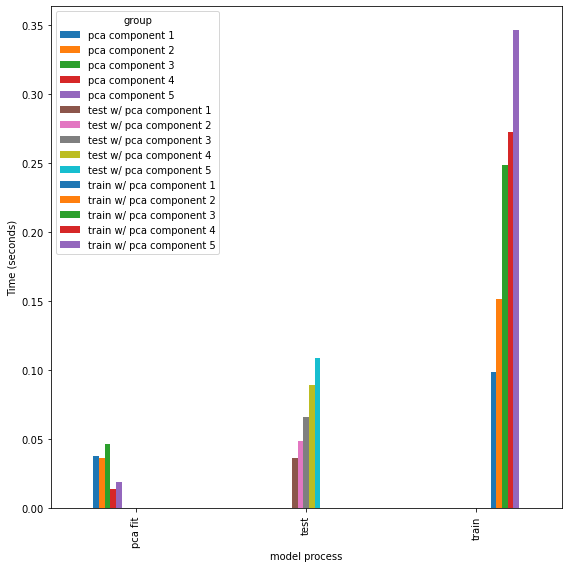

In [40]:
time_lst = []
for i in list(time_stamps.keys()):
    time_lst.append([i, list(time_stamps[i].keys())[0], list(time_stamps[i].values())[0]])
    
df = pd.DataFrame(time_lst,columns=['group','column','val'])

ax =df.pivot("column", "group", "val").plot(kind='bar', figsize= (8,8))
ax.set(xlabel='model process', ylabel='Time (seconds)')
plt.tight_layout()
plt.show()

training R^2 with 5 features is 0.6353333310168895.
test R^2 with 5 features is 0.504207491508797.
training R^2 with 4 features is 0.507873363461016.
test R^2 with 4 features is 0.3407556414155445.
training R^2 with 3 features is 0.4670933464873678.
test R^2 with 3 features is 0.2876019312055559.
training R^2 with 2 features is 0.434823175350289.
test R^2 with 2 features is 0.24773003529253146.
training R^2 with 1 features is 0.2523802073048571.
test R^2 with 1 features is 0.1604042977259491.


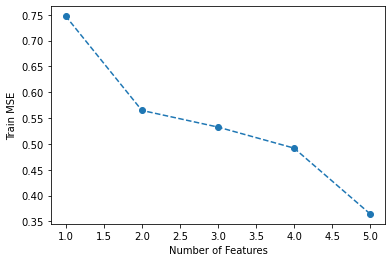

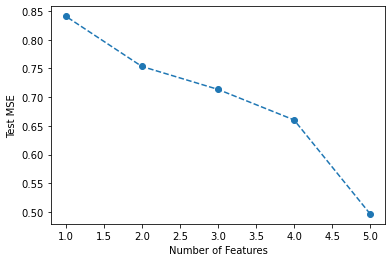

In [41]:
time_stamps = {}
train_mse = []
test_mse = []

df_scaled_x = df_scaled[:, 0 : df_scaled.shape[1] - 1]
df_scaled_y =  df_scaled[:, df_scaled.shape[1] - 1]

# partitioning the data
np.random.seed(131)
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_x,
    df_scaled_y,
    random_state=0,
    test_size=0.30,
)
knn = KNeighborsRegressor(n_neighbors=7)

# training
start_time = time.time()
knn.fit(X_train,y_train)
prediction = knn.predict(X_train)
train_mse.append(mean_squared_error(y_train, prediction))
stop_time = time.time()
total = stop_time - start_time
time_stamps[f"train w/ sfs {5}"] = {'train':total}
print(f'training R^2 with {5} features is {r2_score(y_train, prediction)}.')

# testing
start_time = time.time()
prediction = knn.predict(X_test)
test_mse.append(mean_squared_error(y_test, prediction))
stop_time = time.time()
total = stop_time - start_time
time_stamps[f"test w/ sfs {5}"] = {'test':total}
print(f'test R^2 with {5} features is {r2_score(y_test, prediction)}.')

np.random.seed(131)
for i in [4,3,2,1]:    
    # backward selection
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=7)
    sfs = SequentialFeatureSelector(knn, n_features_to_select=i,direction='backward',scoring='neg_mean_squared_error')
    sfs.fit(df_scaled_x,df_scaled_y)
    Xtest=sfs.transform(df_scaled_x)
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ sfs {i}"] = {'train':total}

    # partitioning the data
    np.random.seed(131)
    X_train, X_test, y_train, y_test = train_test_split(
        Xtest,
        df_scaled_y,
        random_state=0,
        test_size=0.30,
    )

    # training
    start_time = time.time()
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_train)
    train_mse.append(mean_squared_error(y_train, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ sfs {i}"] = {'train':total}
    print(f'training R^2 with {i} features is {r2_score(y_train, prediction)}.')
    
    # testing
    start_time = time.time()
    prediction = knn.predict(X_test)
    test_mse.append(mean_squared_error(y_test, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"test w/ sfs {i}"] = {'test':total}
    print(f'test R^2 with {i} features is {r2_score(y_test, prediction)}.')

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]),
    train_mse,
    linestyle="--",
    marker="o",
)
plt.ylabel("Train MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), test_mse, linestyle="--", marker="o"
)
plt.ylabel("Test MSE")
plt.xlabel("Number of Features")
plt.show()

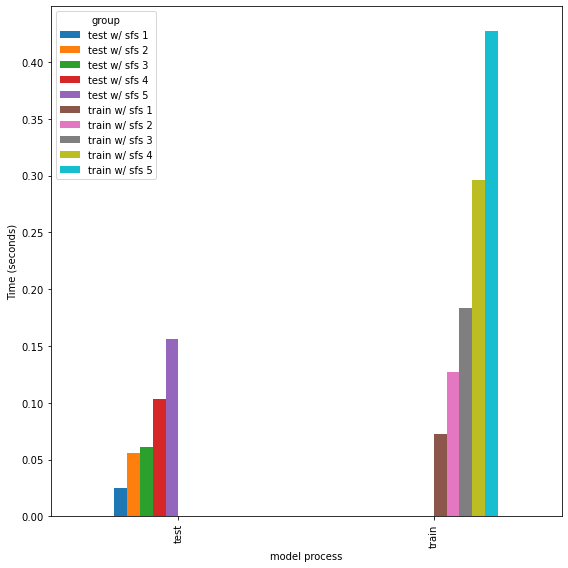

In [42]:
time_lst = []
for i in list(time_stamps.keys()):
    time_lst.append([i, list(time_stamps[i].keys())[0], list(time_stamps[i].values())[0]])
    
df = pd.DataFrame(time_lst,columns=['group','column','val'])

ax =df.pivot("column", "group", "val").plot(kind='bar', figsize= (8,8))
ax.set(xlabel='model process', ylabel='Time (seconds)')
plt.tight_layout()
plt.show()

training R^2 with 5 features is 0.2612894141195038.
test R^2 with 5 features is 0.2570583199401475.
training R^2 with 4 features is 0.2246263135158647.
test R^2 with 4 features is 0.2164156538384624.
training R^2 with 3 features is 0.2094101943998583.
test R^2 with 3 features is 0.20334988161387924.
training R^2 with 2 features is 0.18709489662070367.
test R^2 with 2 features is 0.1810223965771749.
training R^2 with 1 features is 0.12883607722628987.
test R^2 with 1 features is 0.12303431224566264.


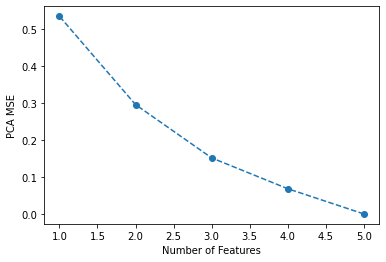

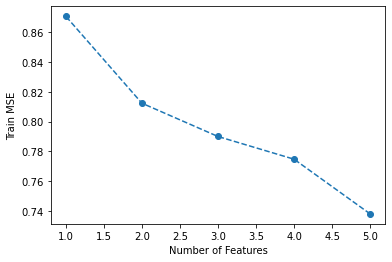

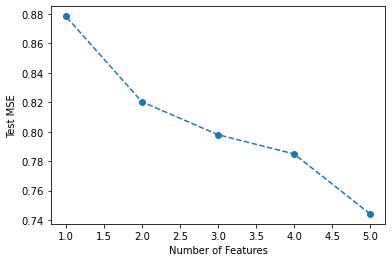

In [47]:
time_stamps = {}
train_mse = []
test_mse = []
pca_mse = []
df_scaled_x = df_scaled[:, 0 : df_scaled.shape[1] - 1]
for i in list(range(1, df_scaled_x.shape[1] + 1))[::-1]:
    # pca
    start_time = time.time()
    pca = PCA(n_components=i)
    pca.fit(df_scaled_x)
    X_Reduced = pca.transform(df_scaled_x)
    XReconstructed = pca.inverse_transform(X_Reduced)
    pca_mse.append(mean_squared_error(df_scaled_x, XReconstructed))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"pca component {i}"] = {"pca fit":total}

    # partitioning the data
    np.random.seed(131)
    X_train, X_test, y_train, y_test = train_test_split(
        X_Reduced,
        df_scaled[:, df_scaled.shape[1] - 1],
        random_state=0,
        test_size=0.30,
    )
    # training
    start_time = time.time()
    lnreg = LinearRegression()
    lnreg.fit(X_train,y_train)
    prediction = lnreg.predict(X_train)
    train_mse.append(mean_squared_error(y_train, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ pca component {i}"] = {'train':total}
    print(f'training R^2 with {i} features is {r2_score(y_train, prediction)}.')
    
    # testing
    start_time = time.time()
    prediction = lnreg.predict(X_test)
    test_mse.append(mean_squared_error(y_test, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"test w/ pca component {i}"] = {'test':total}
    print(f'test R^2 with {i} features is {r2_score(y_test, prediction)}.')
plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), pca_mse, linestyle="--", marker="o"
)
plt.ylabel("PCA MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]),
    train_mse,
    linestyle="--",
    marker="o",
)
plt.ylabel("Train MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), test_mse, linestyle="--", marker="o"
)
plt.ylabel("Test MSE")
plt.xlabel("Number of Features")
plt.show()

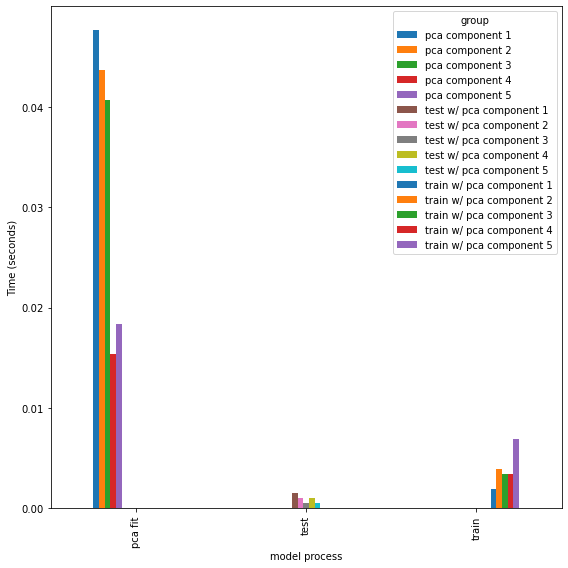

In [48]:
time_lst = []
for i in list(time_stamps.keys()):
    time_lst.append([i, list(time_stamps[i].keys())[0], list(time_stamps[i].values())[0]])
    
df = pd.DataFrame(time_lst,columns=['group','column','val'])

ax =df.pivot("column", "group", "val").plot(kind='bar', figsize= (8,8))
ax.set(xlabel='model process', ylabel='Time (seconds)')
plt.tight_layout()
plt.show()

training R^2 with 5 features is 0.2612894141195038.
test R^2 with 5 features is 0.2570583199401475.
training R^2 with 4 features is 0.26049493793488576.
test R^2 with 4 features is 0.2566445761129966.
training R^2 with 3 features is 0.2603399987195437.
test R^2 with 3 features is 0.25642312147781865.
training R^2 with 2 features is 0.247087035739448.
test R^2 with 2 features is 0.2414334851344443.
training R^2 with 1 features is 0.24012560011976924.
test R^2 with 1 features is 0.23429899078973127.


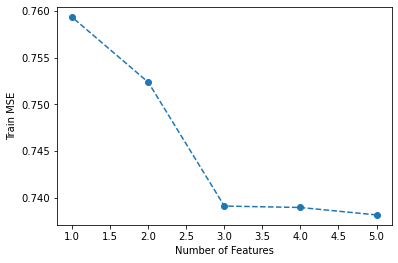

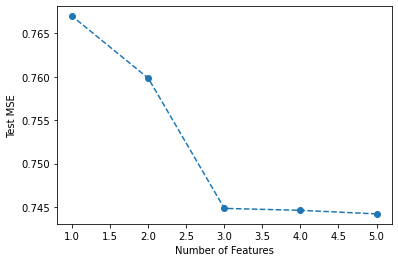

In [45]:
time_stamps = {}
train_mse = []
test_mse = []

df_scaled_x = df_scaled[:, 0 : df_scaled.shape[1] - 1]
df_scaled_y =  df_scaled[:, df_scaled.shape[1] - 1]

# partitioning the data
np.random.seed(131)
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_x,
    df_scaled_y,
    random_state=0,
    test_size=0.30,
)
lnreg = LinearRegression()

# training
start_time = time.time()
lnreg.fit(X_train,y_train)
prediction = lnreg.predict(X_train)
train_mse.append(mean_squared_error(y_train, prediction))
stop_time = time.time()
total = stop_time - start_time
time_stamps[f"train w/ sfs {5}"] = {'train':total}
print(f'training R^2 with {5} features is {r2_score(y_train, prediction)}.')

# testing
start_time = time.time()
prediction = lnreg.predict(X_test)
test_mse.append(mean_squared_error(y_test, prediction))
stop_time = time.time()
total = stop_time - start_time
time_stamps[f"test w/ sfs {5}"] = {'test':total}
print(f'test R^2 with {5} features is {r2_score(y_test, prediction)}.')

np.random.seed(131)
for i in [4,3,2,1]:    
    # backward selection
    start_time = time.time()
    lnreg = LinearRegression()
    sfs = SequentialFeatureSelector(lnreg, n_features_to_select=i,direction='backward',scoring='neg_mean_squared_error')
    sfs.fit(df_scaled_x,df_scaled_y)
    Xtest=sfs.transform(df_scaled_x)
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ sfs {i}"] = {'train':total}

    # partitioning the data
    np.random.seed(131)
    X_train, X_test, y_train, y_test = train_test_split(
        Xtest,
        df_scaled_y,
        random_state=0,
        test_size=0.30,
    )

    # training
    start_time = time.time()
    lnreg.fit(X_train,y_train)
    prediction = lnreg.predict(X_train)
    train_mse.append(mean_squared_error(y_train, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"train w/ sfs {i}"] = {'train':total}
    print(f'training R^2 with {i} features is {r2_score(y_train, prediction)}.')
    
    # testing
    start_time = time.time()
    prediction = lnreg.predict(X_test)
    test_mse.append(mean_squared_error(y_test, prediction))
    stop_time = time.time()
    total = stop_time - start_time
    time_stamps[f"test w/ sfs {i}"] = {'test':total}
    print(f'test R^2 with {i} features is {r2_score(y_test, prediction)}.')

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]),
    train_mse,
    linestyle="--",
    marker="o",
)
plt.ylabel("Train MSE")
plt.xlabel("Number of Features")
plt.show()

plt.plot(
    list(range(1, df_scaled_x.shape[1] + 1)[::-1]), test_mse, linestyle="--", marker="o"
)
plt.ylabel("Test MSE")
plt.xlabel("Number of Features")
plt.show()

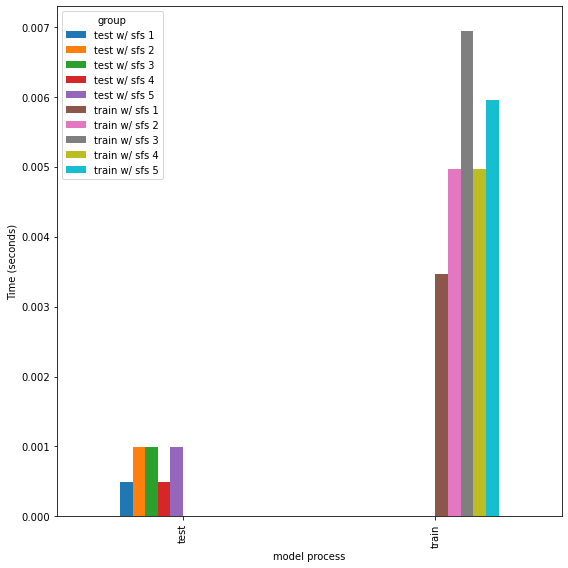

In [46]:
time_lst = []
for i in list(time_stamps.keys()):
    time_lst.append([i, list(time_stamps[i].keys())[0], list(time_stamps[i].values())[0]])
    
df = pd.DataFrame(time_lst,columns=['group','column','val'])

ax =df.pivot("column", "group", "val").plot(kind='bar', figsize= (8,8))
ax.set(xlabel='model process', ylabel='Time (seconds)')
plt.tight_layout()
plt.show()